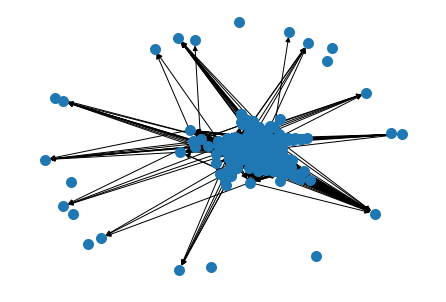

In [108]:
import pandas 
import csv
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random
import collections
from math import inf, log
G=nx.read_gexf('friends.gexf')
nodes_num = G.number_of_nodes()
nx.draw(G, node_size=100) 
plt.draw()  
# матрица и список смежности
G_pd = nx.to_pandas_adjacency(G)
G_pd.to_csv('matrix.csv')
new_list = []
G_list = nx.to_dict_of_lists(G)
for i, ls in G_list.items():
    ls.insert(0, i)
    new_list.append(ls)
f = open('list.csv','w')
writer = csv.writer(f)
for k in new_list:
    writer.writerow(k)
f.close()

# Первый пункт
**Функция поиска в глубину**

In [45]:
def dfs(graph, u, vis, c):
    vis.add(u)
    c.append(u)
    for v in list(graph.neighbors(u)):                          
        if not v in vis:                          
            c = dfs(graph, v, vis, c)
    return c



**Является ли граф связным?**

In [46]:
graf = dfs(G, random.choice(list(G.nodes())),set(),[])
if len(graf) == nodes_num:
    print('Граф связный')
else:
    print('Граф не связный')

Граф не связный




**С помощью функции поиска в глубину определим компоненты слабой связности**


In [55]:
visited = set()
comps = []
    
for i in G.nodes():
    if not i in visited:
        comps.append(dfs(G,i,visited,[]))
    
max = 0
for i in range(len(comps)):
    if len(comps[i]) > len(comps[max]):
        max = i
    print(f'В {i+1} компоненте:',len(comps[i]))

max_comp = comps[max]
print( f'В {max+1} комоненте:',len(comps[max])/nodes_num*100,'процентов')

В 1 компоненте: 282
В 2 компоненте: 1
В 3 компоненте: 1
В 4 компоненте: 1
В 5 компоненте: 1
В 6 компоненте: 1
В 7 компоненте: 1
В 8 компоненте: 1
В 9 компоненте: 1
В 10 компоненте: 1
В 1 комоненте: 96.90721649484536 процентов


**Компоненты сильной связности**

In [48]:
reversed_graph = nx.Graph(nx.reverse_view(G))
visited = set()
comps = []
nodes = [] 
for i in G.nodes():
    if not i in visited:
        nodes += dfs(G,i,visited,[])            
visited = set()
while nodes:
    comp = []
    if len(nodes) > 1:
        comp = dfs(reversed_graph,nodes[-1],visited,[])
        for c in comp:
            reversed_graph.remove_node(c)
            nodes.remove(c)
    else:
        comp = nodes[-1]
        nodes = []
    comps.append(comp)  
max = 0
for i in range(len(comps)):
    if len(comps[i]) > len(comps[max]):
        max = i
    print(f'В {i+1} компоненте:',len(comps[i]))

В 1 компоненте: 1
В 2 компоненте: 1
В 3 компоненте: 1
В 4 компоненте: 1
В 5 компоненте: 1
В 6 компоненте: 1
В 7 компоненте: 1
В 8 компоненте: 1
В 9 компоненте: 1
В 10 компоненте: 282


# Второй пункт
**Строим гистограмму распределения степеней вершин**


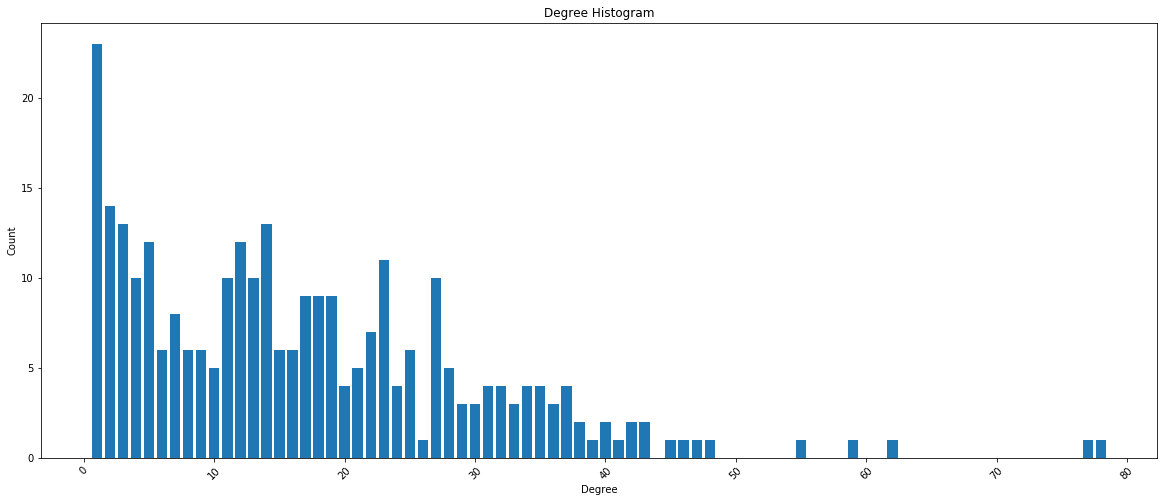

In [65]:
degree_sequence = sorted([len(i) for i in G_list.values()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, width=0.8,figure=plt.figure(figsize=(20,8)))

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks(rotation=45)
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg);

**Средняя степень вершин**

In [67]:
print(np.mean(degree_sequence))

16.938144329896907


**Наибольшая компонента связности**

In [76]:
comp = nx.to_dict_of_lists(G.to_undirected())
excess_nodes = set(nx.to_dict_of_lists(G.to_undirected()).keys()).difference(set(max_comp))
for node in excess_nodes:
    comp.pop(node)
    for key in comp.keys():
        if node in comp[key]:
            comp[key].remove(node)

max_comp = nx.from_dict_of_lists(comp)
max_comp_matrix = nx.to_numpy_matrix(max_comp)

**Демонстрация наибольшей компоненты связности**

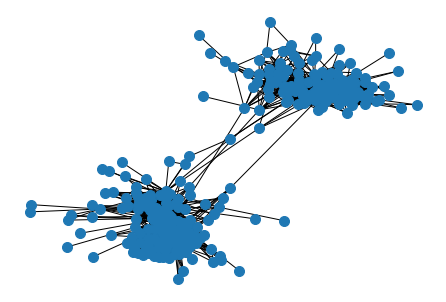

In [77]:
nx.draw(max_comp, node_size=100) 
plt.draw()

**Находим кратчайшие расстояния между вершинами (Флойд-Воршалл)**

In [81]:
def floyd_vor(G):
    for i in range(G.shape[0]):
        for j in range(G.shape[0]):
            if G[i, j] == 0:
                G[i, j] = inf
        G[i, i] = 1
    for k in range(G.shape[0]):
        for i in range(G.shape[0]):
            for j in range(G.shape[0]):
                G[i, j] = min(G[i, j], G[i, k] + G[k, j])

min_dist = max_comp_matrix.copy()
floyd_vor(min_dist)
print(min_dist)


[[1. 4. 1. ... 5. 5. 5.]
 [4. 1. 3. ... 3. 3. 3.]
 [1. 3. 1. ... 4. 4. 4.]
 ...
 [5. 3. 4. ... 1. 3. 2.]
 [5. 3. 4. ... 3. 1. 3.]
 [5. 3. 4. ... 2. 3. 1.]]


In [82]:
diametr = np.max(min_dist[:])
print('Диаметр =', diametr)
radius = min([np.max(i) for i in min_dist])
print('Радиус =', radius)

Диаметр = 8.0
Радиус = 4.0


In [87]:
indexes = list(nx.to_pandas_adjacency(max_comp))

print("Периферийные вершины:")
periphery = [i for i in range(min_dist.shape[0]) if np.max(min_dist[i]) == diametr]
for i in periphery:
    print(indexes[i])

print("\nЦентральные вершины:")
center = [i for i in range(min_dist.shape[0]) if np.max(min_dist[i]) == radius]
for i in center:
    print(indexes[i])

Периферийные вершины:
110106592
134691085
149082611
210724614

Центральные вершины:
66036589
103272953


In [88]:
print("Средняя длина пути в графе:", np.mean(min_dist))


Средняя длина пути в графе: 3.3798853176399577


# Третий пункт
вспомогательные функции, которые помогают применять функции меры к матрице смежности

In [112]:
def mera(Graph, func):
    for i in comp.keys():
        for j in comp.keys():
            Graph[indexes.index(i), indexes.index(j)] = func(i, j)
def N(id):
    return comp[id]

In [103]:
def common_neighbors(i, j):
    return len(set(N(i)).intersection(set(N(j)))) 
mera_common = np.zeros((282, 282))
mera(mera_common, common_neighbors)
res = pd.DataFrame(mera_common, index=indexes)
res.to_csv('common_neighbors.csv', header=indexes)
print(mera_common)

[[10.  0.  7. ...  0.  0.  0.]
 [ 0. 13.  0. ...  0.  0.  0.]
 [ 7.  0. 14. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 11.  0.  2.]
 [ 0.  0.  0. ...  0.  7.  0.]
 [ 0.  0.  0. ...  2.  0.  9.]]


In [105]:
def jaccard_coefficient(i, j):
    return len(set(N(i)).intersection(set(N(j))))/len(set(N(i)).union(set(N(j))))
mera_jaccard = np.zeros((282, 282))
mera(mera_jaccard, jaccard_coefficient)
res = pd.DataFrame(mera_jaccard, index=indexes)
res.to_csv('jaccard_coefficient.csv', header=indexes)
print(mera_jaccard)

[[1.         0.         0.41176471 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.41176471 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.11111111]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.11111111 0.         1.        ]]


In [109]:
def adamic_adar(i, j):
    return sum([1/log(len(N(k))) if len(N(k))!=1 else 0 for k in set(N(i)).intersection(set(N(j)))])
mera_adamic = np.zeros((282, 282))
mera(mera_adamic, adamic_adar)
res = pd.DataFrame(mera_adamic, index=indexes)
res.to_csv('adamic_adar.csv', header=indexes)
print(mera_adamic)

[[3.52987911 0.         2.42006759 ... 0.         0.         0.        ]
 [0.         6.35548327 0.         ... 0.         0.         0.        ]
 [2.42006759 0.         5.57692016 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 4.12261974 0.         0.72489944]
 [0.         0.         0.         ... 0.         2.40373149 0.        ]
 [0.         0.         0.         ... 0.72489944 0.         3.42961165]]


In [111]:
def preferential_attachment(i, j):
    return len(N(i))*len(N(j))
mera_preferential = np.zeros((282, 282))
mera(mera_preferential, preferential_attachment)
res = pd.DataFrame(mera_preferential, index=indexes)
res.to_csv('preferential_attachment.csv', header=indexes)
print(mera_preferential)

[[100. 130. 140. ... 110.  70.  90.]
 [130. 169. 182. ... 143.  91. 117.]
 [140. 182. 196. ... 154.  98. 126.]
 ...
 [110. 143. 154. ... 121.  77.  99.]
 [ 70.  91.  98. ...  77.  49.  63.]
 [ 90. 117. 126. ...  99.  63.  81.]]


# Четвертый пункт
**Вычисление метрик и их визуализация,чем ярче цвет , тем больше значение**

**Метрика центральности по степени**

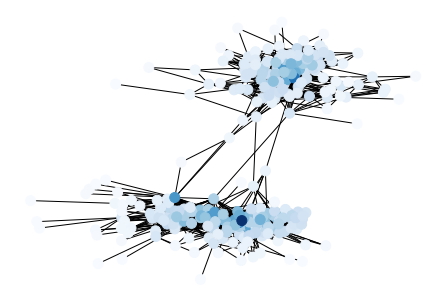

In [131]:
degree_centrality = list(map(lambda node: len(list(max_comp.neighbors(node)))/(len(max_comp)-1), list(max_comp.node())))
nx.draw(max_comp, pos=None, node_size=100, node_color=degree_centrality, cmap=plt.cm.Blues)
plt.draw()

**Метрика центральности по близости**

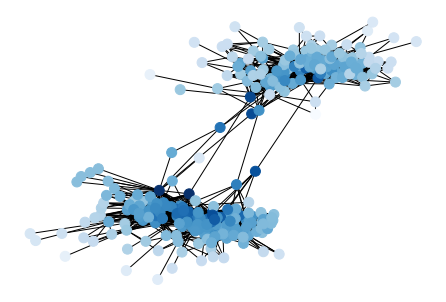

In [129]:
def closeness_centrality(id):
    return (len(comp.keys()) - 1)/(np.sum(min_dist[indexes.index(id)])-min_dist[indexes.index(id), indexes.index(id)])
def metrics_count(d, metric):
    for i in indexes:
        d.update({i: metric(i)})
closeness = {}
metrics_count(closeness, closeness_centrality)
x = []
for i in closeness.values():
    x.append(i)
nx.draw(max_comp, pos=None, node_size=100, node_color=x, cmap=plt.cm.Blues) 
plt.draw()

**Метрика центральности по собственному вектору**

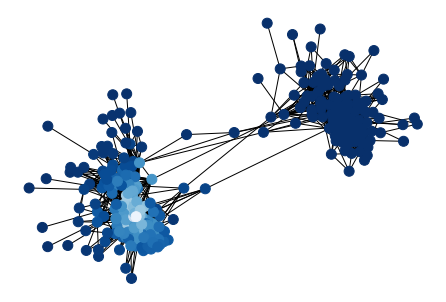

In [130]:
node_index = lambda node: list(max_comp.node()).index(node)
eigenvalues, eigenvectors = np.linalg.eig(nx.to_numpy_matrix(max_comp))
eigenvector_centrality = np.array(list(map(lambda node: 
                                eigenvectors[:,eigenvalues.argmax(axis=0)][node_index(node)], 
                                list(max_comp.node())))).reshape((1,len(max_comp)))[0]


nx.draw(max_comp, pos=None, node_size=100, node_color=eigenvector_centrality, cmap=plt.cm.Blues)
plt.draw()